<a href="https://colab.research.google.com/github/erickwb/Machine-Learning-Projects/blob/main/Deposit%20Analysis/deposit_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Erick Correia Silva

Dataframe: bank-additional

Date: 07/09/2021


In [ ]:
#import das bibliotecas

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
#classificadores
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
#metricas
from yellowbrick.classifier import ConfusionMatrix
from sklearn import metrics
#graficos
import seaborn as sns



##Pre processamento dos dados


(instanciando o datset ,verificando se a dados faltantes, dividindo os dados de amostra e classe, transformando os dados categorios em dados numericos, balanceando os dados da classe ) 

In [ ]:
#abrindo dataset
data = pd.read_csv("bank-additional-full.csv", sep =";")
print(data.shape)
#pre visualizaçao do dataset
data.head(100)

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,45,services,married,professional.course,no,yes,no,telephone,may,mon,221,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
96,42,management,married,university.degree,no,no,no,telephone,may,mon,426,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
97,53,admin.,divorced,university.degree,unknown,no,no,telephone,may,mon,287,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
98,37,technician,single,professional.course,no,no,no,telephone,may,mon,197,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
#informaçoes sobre os dados
print(data.info())

#verificando de a dados faltantes
print(data.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

no     36548
yes     4640
Name: y, dtype: int64

Depositos dentro do prazo 11.2654% do dataset.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


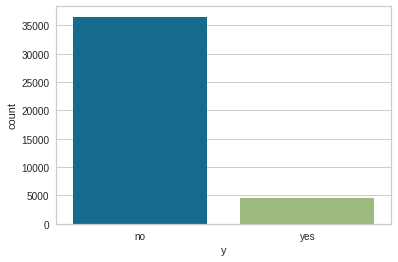

In [ ]:
#verificação do balanceamento das classe 
print(data.y.value_counts())
print("\nDepositos dentro do prazo {:.4f}% do dataset.\n".format((data[data.y == 'yes'].shape[0] / data.shape[0]) * 100))
 
# plotar gráfico de barras para as Classes
sns.countplot('y', data=data);


In [ ]:
X = data.iloc[:,:20].values 
y = data.iloc[:,20].values
#pre visualizaçao das amostras e dos rotulos
print("dados de amostra",X)
print("dados da classe" ,y)

dados de amostra [[56 'housemaid' 'married' ... -36.4 4.857 5191.0]
 [57 'services' 'married' ... -36.4 4.857 5191.0]
 [37 'services' 'married' ... -36.4 4.857 5191.0]
 ...
 [56 'retired' 'married' ... -50.8 1.028 4963.6]
 [44 'technician' 'married' ... -50.8 1.028 4963.6]
 [74 'retired' 'married' ... -50.8 1.028 4963.6]]
dados da classe ['no' 'no' 'no' ... 'no' 'yes' 'no']


In [ ]:
#transformando os dados categorios em dados numericos 

labelencoder_1 = LabelEncoder()
X[:,1] = labelencoder_1.fit_transform(X[:,1])

labelencoder_2 = LabelEncoder()
X[:,2] = labelencoder_2.fit_transform(X[:,2])

labelencoder_3 = LabelEncoder()
X[:,3] = labelencoder_3.fit_transform(X[:,3])

labelencoder_4 = LabelEncoder()
X[:,4] = labelencoder_4.fit_transform(X[:,4])

labelencoder_5 = LabelEncoder()
X[:,5] = labelencoder_5.fit_transform(X[:,5])

labelencoder_6 = LabelEncoder()
X[:,6] = labelencoder_6.fit_transform(X[:,6])

labelencoder_7 = LabelEncoder()
X[:,7] = labelencoder_7.fit_transform(X[:,7])

labelencoder_8 = LabelEncoder()
X[:,8] = labelencoder_8.fit_transform(X[:,8])

labelencoder_9 = LabelEncoder()
X[:,9] = labelencoder_9.fit_transform(X[:,9])

labelencoder_10 = LabelEncoder()
X[:,10] = labelencoder_9.fit_transform(X[:,10])

labelencoder_14 = LabelEncoder()
X[:,14] = labelencoder_14.fit_transform(X[:,14])

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

#Visualizando o datset transformado
df = pd.DataFrame(X)
df



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41184,46,1,1,5,0,0,0,0,7,0,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56,5,1,6,0,2,0,0,7,0,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41186,44,9,1,5,0,0,0,0,7,0,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    4640
0    4640
dtype: int64
(9280,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


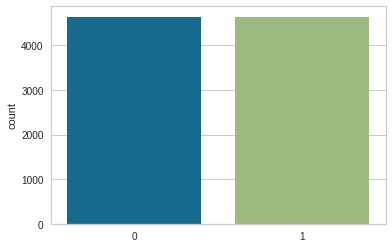

In [ ]:
#balanceando os dados dos dados usando técnica de oversampling
balanceamento = NearMiss()
X, y = balanceamento.fit_sample(X, y)
 
# ver o balanceamento das classes
print(pd.Series(y).value_counts())
 
# plotar a nova distribuição de classes
sns.countplot(y);

print(y.shape)

##Medindo o melhor algoritmo para treinamento usando validação cruzada k-fold 

 Algoritmos utilizados (kNN, SVM, Árvore de Decisão, Random Forest, Gradient Boosting e Redes Neurais)

In [ ]:
'''#metricas
#metricas = ["f1", "precision", "recall"]

'''
Colunas = [
    'algoritmo',
    'parametros',
    'F1_score',
]
dataframe_grid = pd.DataFrame(columns= Colunas) #dataframe para guarda os valores dos grids


#instanciando o 5-fold's
kfold = KFold(n_splits=5, shuffle=True, random_state=42)


##Pipeline e Gridsearch KNN

In [ ]:
#criando o pipeline para KNN
model_knn = Pipeline(steps=[('scaler_normalize', preprocessing.MinMaxScaler()),
                        ('std_scaler', preprocessing.StandardScaler()),
                       ('classifier', KNeighborsClassifier())
])

model_knn.get_params().keys()


dict_keys(['memory', 'steps', 'verbose', 'scaler_normalize', 'std_scaler', 'classifier', 'scaler_normalize__copy', 'scaler_normalize__feature_range', 'std_scaler__copy', 'std_scaler__with_mean', 'std_scaler__with_std', 'classifier__algorithm', 'classifier__leaf_size', 'classifier__metric', 'classifier__metric_params', 'classifier__n_jobs', 'classifier__n_neighbors', 'classifier__p', 'classifier__weights'])

In [ ]:
#paramentros do knn para gridsearch
parameters_knn = {'classifier__n_neighbors': [1,3,5,7], 
                  'classifier__algorithm': ['auto' , 'ball_tree', 'kd_tree', 'brute'],
                  'classifier__weights': ['uniform' , 'distance'],
                  'classifier__metric': ['euclidean' , 'manhattan']}

#instanciando o gridsearch
grid = GridSearchCV(model_knn, param_grid= parameters_knn ,cv=kfold, n_jobs=-1, scoring= 'f1', return_train_score=False)
grid.fit(X, y)

# qual o melhor combinação
print(grid.best_estimator_)
#melhor f1
print(grid.best_score_)

Pipeline(memory=None,
         steps=[('scaler_normalize',
                 MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='manhattan', metric_params=None,
                                      n_jobs=None, n_neighbors=7, p=2,
                                      weights='distance'))],
         verbose=False)
0.7508519068157608


In [ ]:
#adicionando resultados na dataframe
dataframe_grid.loc[len(dataframe_grid)] = 'KNN' ,grid.best_params_ ,grid.best_score_

dataframe_grid

,algoritmo,parametros,F1_score
0,KNN,"{'classifier__algorithm': 'auto', 'classifier_...",0.750852


##Pipeline e Gridsearch SVM




In [ ]:
#criando o pipeline para SVM
model_svm = Pipeline(steps=[('scaler_normalize', preprocessing.MinMaxScaler()), 
                       ('std_scaler', preprocessing.StandardScaler()),
                       ('classifier', svm.SVC(random_state=42))
])

model_svm.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler_normalize', 'std_scaler', 'classifier', 'scaler_normalize__copy', 'scaler_normalize__feature_range', 'std_scaler__copy', 'std_scaler__with_mean', 'std_scaler__with_std', 'classifier__C', 'classifier__break_ties', 'classifier__cache_size', 'classifier__class_weight', 'classifier__coef0', 'classifier__decision_function_shape', 'classifier__degree', 'classifier__gamma', 'classifier__kernel', 'classifier__max_iter', 'classifier__probability', 'classifier__random_state', 'classifier__shrinking', 'classifier__tol', 'classifier__verbose'])

In [ ]:
#paramentros do svm para gridsearch
parameters_svm = {            
             'classifier__C': np.logspace(0,4,10),
             'classifier__kernel': ['rbf'],
             'classifier__gamma': ['scale', 'auto'],
             'classifier__max_iter': [-1,10,100]}

#instanciando o gridsearch
grid = GridSearchCV(model_svm, param_grid= parameters_svm ,cv=kfold, n_jobs=-1, scoring= 'f1', return_train_score=False)
grid.fit(X, y)

# qual o melhor combinação
print(grid.best_estimator_)
#melhor f1
print(grid.best_score_)

Pipeline(memory=None,
         steps=[('scaler_normalize',
                 MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=42, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
0.8052826628391673


In [ ]:
#adicionando resultados na dataframe
dataframe_grid.loc[len(dataframe_grid)] = 'SVM' ,grid.best_params_ ,grid.best_score_

dataframe_grid

,algoritmo,parametros,F1_score
0,KNN,"{'classifier__algorithm': 'auto', 'classifier_...",0.750852
1,SVM,"{'classifier__C': 1.0, 'classifier__gamma': 's...",0.805283


##Pipeline e Gridseach Árvore de Decisão



In [ ]:
#criando o pipeline para decisiontree
model_decisiontree = Pipeline(steps=[('scaler_normalize', preprocessing.MinMaxScaler()), 
                       ('std_scaler', preprocessing.StandardScaler()),
                       ('classifier', DecisionTreeClassifier())
])

model_decisiontree.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler_normalize', 'std_scaler', 'classifier', 'scaler_normalize__copy', 'scaler_normalize__feature_range', 'std_scaler__copy', 'std_scaler__with_mean', 'std_scaler__with_std', 'classifier__ccp_alpha', 'classifier__class_weight', 'classifier__criterion', 'classifier__max_depth', 'classifier__max_features', 'classifier__max_leaf_nodes', 'classifier__min_impurity_decrease', 'classifier__min_impurity_split', 'classifier__min_samples_leaf', 'classifier__min_samples_split', 'classifier__min_weight_fraction_leaf', 'classifier__presort', 'classifier__random_state', 'classifier__splitter'])

In [ ]:
#paramentros do grid para decisiontree
parameters_decisiontree = {     
             'classifier__criterion' : ['gini', 'entropy'],
             'classifier__max_depth' : [2,4,6,8,10,12]
             }

#instanciando o gridsearch
grid = GridSearchCV(model_decisiontree, param_grid= parameters_decisiontree ,cv=kfold, n_jobs=-1, scoring= 'f1', return_train_score=False)
grid.fit(X, y)

# qual o melhor combinação
print(grid.best_estimator_)
#melhor f1
print(grid.best_score_)

Pipeline(memory=None,
         steps=[('scaler_normalize',
                 MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=8,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=None,
                                        splitter='best'))],
         verbose=False)
0.7996703469990074


In [ ]:
#adicionando resultados na dataframe
dataframe_grid.loc[len(dataframe_grid)] = 'Arvore de decisão' ,grid.best_params_ ,grid.best_score_

dataframe_grid

,algoritmo,parametros,F1_score
0,KNN,"{'classifier__algorithm': 'auto', 'classifier_...",0.750852
1,SVM,"{'classifier__C': 1.0, 'classifier__gamma': 's...",0.805283
2,Arvore de decisão,"{'classifier__criterion': 'gini', 'classifier_...",0.799670


##Pipeline e Gridseach Random Forest


In [ ]:
#criando o pipeline para Random forest
model_rf = Pipeline(steps=[('scaler_normalize', preprocessing.MinMaxScaler()), 
                       ('std_scaler', preprocessing.StandardScaler()),
                       ('classifier', RandomForestClassifier(random_state=42))
])

model_rf.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler_normalize', 'std_scaler', 'classifier', 'scaler_normalize__copy', 'scaler_normalize__feature_range', 'std_scaler__copy', 'std_scaler__with_mean', 'std_scaler__with_std', 'classifier__bootstrap', 'classifier__ccp_alpha', 'classifier__class_weight', 'classifier__criterion', 'classifier__max_depth', 'classifier__max_features', 'classifier__max_leaf_nodes', 'classifier__max_samples', 'classifier__min_impurity_decrease', 'classifier__min_impurity_split', 'classifier__min_samples_leaf', 'classifier__min_samples_split', 'classifier__min_weight_fraction_leaf', 'classifier__n_estimators', 'classifier__n_jobs', 'classifier__oob_score', 'classifier__random_state', 'classifier__verbose', 'classifier__warm_start'])

In [ ]:
#parametros para grid_seach Random forest
parameters_rf = { 
    'classifier__n_estimators': [200, 500],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__max_depth' : [4,5,6,7,8],
    'classifier__criterion' :['gini', 'entropy']
}

grid = GridSearchCV(model_rf, param_grid= parameters_rf ,cv=kfold, n_jobs=-1, scoring= 'f1', return_train_score=False)
grid.fit(X, y)

# qual o melhor combinação
print(grid.best_estimator_)
#melhor f1
print(grid.best_score_)

Pipeline(memory=None,
         steps=[('scaler_normalize',
                 MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=8, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=200, n_jobs=None,
                                        oob_score=False, random_state=42,
         

In [ ]:
#adicionando resultados na dataframe
dataframe_grid.loc[len(dataframe_grid)] = 'Random forest' ,grid.best_params_ ,grid.best_score_

dataframe_grid

,algoritmo,parametros,F1_score
0,KNN,"{'classifier__algorithm': 'auto', 'classifier_...",0.750852
1,SVM,"{'classifier__C': 1.0, 'classifier__gamma': 's...",0.805283
2,Arvore de decisão,"{'classifier__criterion': 'gini', 'classifier_...",0.799670
3,Random forest,"{'classifier__criterion': 'gini', 'classifier_...",0.818439


##Pipeline e Gridseach Gradient Boosting





In [ ]:
#criando o pipeline para Gradient Boosting
model_GB = Pipeline(steps=[('std_scaler', preprocessing.StandardScaler()),
                       ('classifier', GradientBoostingClassifier())
])

model_GB.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'std_scaler', 'classifier', 'std_scaler__copy', 'std_scaler__with_mean', 'std_scaler__with_std', 'classifier__ccp_alpha', 'classifier__criterion', 'classifier__init', 'classifier__learning_rate', 'classifier__loss', 'classifier__max_depth', 'classifier__max_features', 'classifier__max_leaf_nodes', 'classifier__min_impurity_decrease', 'classifier__min_impurity_split', 'classifier__min_samples_leaf', 'classifier__min_samples_split', 'classifier__min_weight_fraction_leaf', 'classifier__n_estimators', 'classifier__n_iter_no_change', 'classifier__presort', 'classifier__random_state', 'classifier__subsample', 'classifier__tol', 'classifier__validation_fraction', 'classifier__verbose', 'classifier__warm_start'])

In [ ]:
model_GB =GradientBoostingClassifier()

#parametros para grid_seach gradient boosting
parameters_GB = {
    "learning_rate": [0.01, 0.025, 0.05],
    "max_depth":[3,4,5],
    "max_features":["log2"],
    "criterion": ["mae"],
    }

grid = GridSearchCV(model_GB, param_grid= parameters_GB ,cv=kfold, n_jobs=-1, scoring= 'f1', return_train_score=False)
grid.fit(X, y)

# qual o melhor combinação
print(grid.best_estimator_)
#melhor f1
print(grid.best_score_)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='mae', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=5,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
0.8147091327303599


In [ ]:
#adicionando resultados na dataframe
dataframe_grid.loc[len(dataframe_grid)] = 'Gradient boosting' ,grid.best_params_ ,grid.best_score_

dataframe_grid

,algoritmo,parametros,F1_score
0,KNN,"{'classifier__algorithm': 'auto', 'classifier_...",0.750852
1,SVM,"{'classifier__C': 1.0, 'classifier__gamma': 's...",0.805283
2,Arvore de decisão,"{'classifier__criterion': 'gini', 'classifier_...",0.799670
3,Random forest,"{'classifier__criterion': 'gini', 'classifier_...",0.818439
4,Gradient boosting,"{'criterion': 'mae', 'learning_rate': 0.05, 'm...",0.814709


##Pipeline e Gridseach Rede Neural


In [ ]:
#criando o pipeline para Rede Neural
model_RN = Pipeline(steps=[ ('std_scaler', preprocessing.StandardScaler()),
                       ('classifier',MLPClassifier())
])

model_RN.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'std_scaler', 'classifier', 'std_scaler__copy', 'std_scaler__with_mean', 'std_scaler__with_std', 'classifier__activation', 'classifier__alpha', 'classifier__batch_size', 'classifier__beta_1', 'classifier__beta_2', 'classifier__early_stopping', 'classifier__epsilon', 'classifier__hidden_layer_sizes', 'classifier__learning_rate', 'classifier__learning_rate_init', 'classifier__max_fun', 'classifier__max_iter', 'classifier__momentum', 'classifier__n_iter_no_change', 'classifier__nesterovs_momentum', 'classifier__power_t', 'classifier__random_state', 'classifier__shuffle', 'classifier__solver', 'classifier__tol', 'classifier__validation_fraction', 'classifier__verbose', 'classifier__warm_start'])

In [ ]:
model_RN = MLPClassifier()

parameters_RN = {
    'solver': ['lbfgs'],
    'max_iter': [500,1000],
    'alpha': 10.0 ** -np.arange(1, 7), #valores de alpha 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06])
    'hidden_layer_sizes':np.arange(5, 9),
    'random_state':[3,4,5,6]
  }
  
grid = GridSearchCV(model_RN, param_grid= parameters_RN ,cv=kfold, n_jobs=-1, scoring= 'f1', return_train_score=False)
grid.fit(X,y)

# qual o melhor combinação
print(grid.best_estimator_)
#melhor f1
print(grid.best_score_)


MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=6, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=3, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
0.6664289906571365


In [ ]:
#adicionando resultados na dataframe
dataframe_grid.loc[len(dataframe_grid)] = 'Rede Neural' ,grid.best_params_ ,grid.best_score_

dataframe_grid

,algoritmo,parametros,F1_score
0,KNN,"{'classifier__algorithm': 'auto', 'classifier_...",0.750852
1,SVM,"{'classifier__C': 1.0, 'classifier__gamma': 's...",0.805283
2,Arvore de decisão,"{'classifier__criterion': 'gini', 'classifier_...",0.799670
3,Random forest,"{'classifier__criterion': 'gini', 'classifier_...",0.818439
4,Gradient boosting,"{'criterion': 'mae', 'learning_rate': 0.05, 'm...",0.814709
5,Rede Neural,"{'alpha': 0.1, 'hidden_layer_sizes': 6, 'max_i...",0.666429


##Avaliando melhor modelo

In [ ]:
#encontrando o maior valor de F1 
result = dataframe_grid.loc[dataframe_grid['F1_score'].idxmax()]
print(result , "\n \n Lista de parametros")


result.parametros


algoritmo                                         Random forest
parametros    {'classifier__criterion': 'gini', 'classifier_...
F1_score                                               0.818439
Name: 3, dtype: object 
 
 Lista de parametros


{'classifier__criterion': 'gini',
 'classifier__max_depth': 8,
 'classifier__max_features': 'auto',
 'classifier__n_estimators': 200}